<a href="https://colab.research.google.com/github/JamileSantos/Modelos_Ciencia_de_Dados/blob/master/base_vacinacao_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando a biblioteca
import pandas as pd # pandas
import numpy as np  # numpy
import matplotlib.pyplot as plt

In [ ]:
# Importando os dados para o Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando dados de Arquivo ".csv"

In [ ]:
# Importanto os dados
dadosx = pd.read_csv('/content/drive/My Drive/base_vacina.csv')

dadosx.head(3)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
0,60aeb975-94ed-4113-a8b0-ac55dbb8ab41-i0b0,433768b2c569be2ff29976dea5cddd0eeb907de38c254e...,79.0,1942-01-28,F,1.0,BRANCA,432225.0,10.0,TUPANDI,BRASIL,RS,95775.0,B,2227428,PREFEITURA MUNICIPAL DE SAO SEBASTIAO DO CAI,CENTRO DE SAUDE DR BRUNO CASSEL,431950.0,SAO SEBASTIAO DO CAI,RS,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,210018A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-16T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 03:20:03
1,b68c468e-8083-4cca-8da1-ea9a8decbaba-i0b0,8499ef2ad9174cee4bd4dac8ae172a706775f4c835cb17...,90.0,1930-09-11,M,2.0,PRETA,430930.0,10.0,GUAIBA,BRASIL,RS,92500.0,B,2225999,PREFEITURA MUNICIPAL DE GUAIBA,UNIDADE BASICA DE SAUDE COHAB,430930.0,GUAIBA,RS,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,210018A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-11T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 16:04:01
2,db74d38d-be6e-4b1a-82d0-e2797c3b55e7-i0b0,1c8b855733d6ea88081712bd74f95ca36bef67ac83b168...,91.0,1929-06-25,F,1.0,BRANCA,316900.0,10.0,TOCANTINS,BRASIL,MG,36512.0,B,2162776,PREFEITURA MUNICIPAL DE TOCANTINS,CENTRO INTEGRADO DE SAUDE DE TOCANTINS,316900.0,TOCANTINS,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-12T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-15 19:32:10


In [ ]:
# visualiza o total de registros
print('Total de Registros :> ',len(dadosx))

Total de Registros :>  7908949


In [ ]:
# Extraindo uma amostra de Dados por UF do estabelecimento

estado_rj = dadosx[dadosx['estabelecimento_uf']=='RJ']
estado_rj.head(3)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
69,8b6308bb-3914-4781-8abd-a15dcdf58b42-i0b0,bc7cff0d921fa6ab18d4f989212908ca706ebc7a3eb9db...,39.0,1981-11-24,F,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,20510.0,B,7873565,SMS RIO CF JOSE DE SOUZA HERDY AP 40,SMS CF JOSE DE SOUZA HERDY AP 40,330455.0,RIO DE JANEIRO,RJ,915,Nutricionista,9.0,Trabalhadores de Saúde,210011A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-16T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-20 01:49:09
78,0e18ba11-0a6e-4d59-ad1d-545b32cc11fc-i0b0,bebecaf422997259cd169a30ee3cffb3338ef17f66d1f3...,64.0,1956-07-28,F,99.0,SEM INFORMACAO,330330.0,10.0,NITEROI,BRASIL,RJ,24120.0,B,12580,FUNDACAO MUNICIPAL DE SAUDE,POLICLINICA COMUNITARIA DR SERGIO AROUCA,330330.0,NITEROI,RJ,919,Psicólogo,9.0,Trabalhadores de Saúde,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-04T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-12 22:22:06
118,cc86de35-3743-41bb-9036-f64e26e76edb-i0b0,7f18c0668751ab4ba0fe18e6c4bb97557be27923f322eb...,86.0,1934-02-20,F,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,20550.0,B,2269376,SMS RIO CMS HEITOR BELTRAO AP 22,SMS CMS HEITOR BELTRAO AP 22,330455.0,RIO DE JANEIRO,RJ,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-11T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-18 14:29:52


In [ ]:
## Extraindo dados dos Pacientes que moram no RJ

estado_rj_paciente = dadosx[dadosx['paciente_endereco_nmMunicipio']=='RIO DE JANEIRO']
estado_rj_paciente.head(10)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
69,8b6308bb-3914-4781-8abd-a15dcdf58b42-i0b0,bc7cff0d921fa6ab18d4f989212908ca706ebc7a3eb9db...,39.0,1981-11-24,F,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,20510.0,B,7873565,SMS RIO CF JOSE DE SOUZA HERDY AP 40,SMS CF JOSE DE SOUZA HERDY AP 40,330455.0,RIO DE JANEIRO,RJ,915,Nutricionista,9.0,Trabalhadores de Saúde,210011A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-16T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-20 01:49:09
118,cc86de35-3743-41bb-9036-f64e26e76edb-i0b0,7f18c0668751ab4ba0fe18e6c4bb97557be27923f322eb...,86.0,1934-02-20,F,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,20550.0,B,2269376,SMS RIO CMS HEITOR BELTRAO AP 22,SMS CMS HEITOR BELTRAO AP 22,330455.0,RIO DE JANEIRO,RJ,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-11T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-18 14:29:52
137,b8f7d175-ead5-4a24-ae88-bb49103bf6ab-i0b0,1d56ff050247f4b4bae2cd44d0e42e75787f4baefa39f5...,27.0,1993-12-01,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,NaN,B,2269902,SMS RIO CMS DOUTOR JOSE BREVES DOS SANTOS AP 31,SMS CMS JOSE BREVES DOS SANTOS AP 31,330455.0,RIO DE JANEIRO,RJ,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-01T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-01 17:34:57
164,d25a1f02-355d-4b92-88dc-91c0e0dda704-i0b0,36555374e8243b1cab283fa7e38169f8cda5813e58b670...,77.0,1943-10-28,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,22783.0,B,2289458,SMS BELFORD ROXO,PRS HELIOPOLIS MONSENHOR SOLANO DE MENEZES,330045.0,BELFORD ROXO,RJ,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,210011A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-18T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-26 12:09:16
176,e62ea991-bb7a-4ef3-af88-2e377cc7b45d-i0b0,4d39a8db2a9378d38764e6a6c727419d37e08976b35ad8...,61.0,1960-01-21,M,3.0,PARDA,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,21866.0,B,5546583,SMS RIO CMS CATIRI AP 51,SMS CMS CATIRI AP 51,330455.0,RIO DE JANEIRO,RJ,926,Outros,9.0,Trabalhadores de Saúde,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-16T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-16 18:22:41
209,afbec498-78b6-49a3-a8b5-558eaf1ddfc6-i0b0,6871fb3159bd97fb3cbe1b4c4d0e6b5a78e0934f5714df...,80.0,1940-11-19,F,3.0,PARDA,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,20271.0,B,7414226,SMS RIO CMS HELIO PELLEGRINO AP 22,SMS CMS HELIO PELLEGRINO AP 22,330455.0,RIO DE JANEIRO,RJ,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,4120Z026,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-27T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-27 14:25:04
210,aeae8990-b66e-4b77-966f-56f06c83a217-i0b0,d7e331d57507419706cf8826567ec24197d6c0c54ef9cd...,83.0,1937-11-18,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,BRASIL,RJ,22080.0,B,2280795,SMS RIO CMS JOAO BARROS BARRETO AP 21,SMS CMS JOAO BARROS BARRETO AP 21,330455.0,RIO DE JANEIRO,RJ,205,Pessoas de 80 anos ou 

In [ ]:
# visualiza o total de registros
print('Total de Registros de Pacientes :> ',len(estado_rj_paciente))

Total de Registros de Pacientes :>  291063


# Tratamentos dos dados
 
1.   Verificar se existe a falta de dados, dados nulos, etc.
2.    Se existe falta de dados, por exemplo, usar os métodos que usa o pandas vistos na última aula. Cada dataset tem suas próprias características.


3. Antes de aplicar qualquer método, devem pensar sobre o dado ou os dados, eles são relevantes para o estudo? Eliminar? substituir? usar Zero? Por quê?
4. Sobre os métodos de visualização: 
  1. Estático (Matplotlib, ..). 
  2. Interativo (plotly, ...)


In [ ]:
#Filtering rows with null values
dadosx.isnull().sum()

document_id                                       0
paciente_id                                       1
paciente_idade                                    1
paciente_dataNascimento                           1
paciente_enumSexoBiologico                        1
paciente_racaCor_codigo                           1
paciente_racaCor_valor                            1
paciente_endereco_coIbgeMunicipio             43868
paciente_endereco_coPais                      43748
paciente_endereco_nmMunicipio                 43814
paciente_endereco_nmPais                      43748
paciente_endereco_uf                          43868
paciente_endereco_cep                       1393174
paciente_nacionalidade_enumNacionalidade      12772
estabelecimento_valor                             0
estabelecimento_razaoSocial                     376
estalecimento_noFantasia                        376
estabelecimento_municipio_codigo                376
estabelecimento_municipio_nome                  376
estabelecime

In [ ]:
dadosx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7908949 entries, 0 to 7908948
Data columns (total 33 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumNacionalidade  object 
 14  es

# Estatísticas descritivas

In [ ]:
# media das colunas
media_c = estado_rj['paciente_idade'].mean()
print("A media de idade da População Vacinada é:", media_c)

A media de idade da População Vacinada é: 62.710188937979495


In [ ]:
group_sexo = estado_rj.groupby('paciente_enumSexoBiologico')    # agrupado por sexo
print('Sexo:',group_sexo.groups)


Sexo: {'F': [69, 78, 118, 136, 137, 164, 209, 224, 263, 281, 397, 452, 482, 501, 509, 540, 571, 604, 606, 611, 668, 701, 712, 716, 754, 786, 803, 849, 876, 934, 935, 967, 972, 973, 1023, 1039, 1045, 1065, 1066, 1082, 1123, 1224, 1254, 1314, 1332, 1336, 1344, 1356, 1381, 1436, 1461, 1497, 1524, 1569, 1589, 1615, 1690, 1694, 1728, 1762, 1831, 1835, 1846, 1853, 1936, 1940, 1943, 1962, 1964, 1994, 2011, 2046, 2058, 2085, 2094, 2113, 2137, 2146, 2166, 2167, 2185, 2214, 2256, 2262, 2270, 2334, 2335, 2342, 2404, 2413, 2417, 2419, 2430, 2438, 2439, 2443, 2455, 2489, 2513, 2528, ...], 'M': [141, 176, 179, 210, 318, 323, 462, 465, 470, 527, 633, 717, 778, 815, 842, 857, 940, 991, 1050, 1091, 1182, 1244, 1371, 1488, 1498, 1648, 1695, 1702, 1793, 1800, 1844, 1854, 1895, 1983, 2010, 2067, 2153, 2163, 2192, 2288, 2340, 2344, 2364, 2374, 2380, 2394, 2540, 2573, 2578, 2609, 2639, 2648, 2659, 2676, 2760, 2767, 2782, 2784, 2817, 2876, 2937, 2941, 3017, 3040, 3088, 3138, 3207, 3268, 3279, 3291, 3295, 349

In [ ]:
# Contablizando grupo de atendimento

G_atendimento = estado_rj['vacina_grupoAtendimento_nome']




# Proviniência de Dados



In [ ]:
#Import ProvDocument to you Python Code
#from prov.model import ProvDocument

# Criando um novo documento de Proveniência
#d1 = ProvDocument()  # d1 is now an empty provenance document



# Visualização Gráfica

# Nova seção

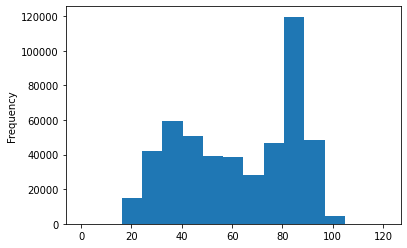

In [ ]:
# histogramas
estado_rj['paciente_idade'].plot.hist(bins=15);

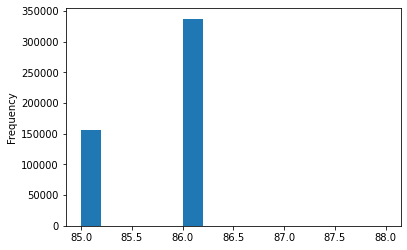

In [ ]:
# histogramas
estado_rj['vacina_codigo'].plot.hist(bins=15);

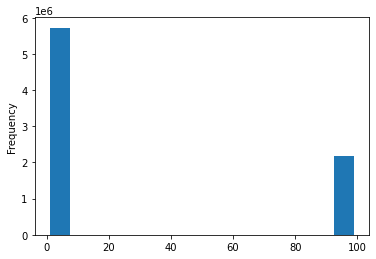